# Task 1: *Section 2 - Data Mining*

In [63]:
# Iris Data Preprocessing and Exploration
# Import required libraries
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## *Step 1: Load the Iris dataset*

In [64]:
iris = load_iris()

# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species as numeric label initially

# Map numeric labels to actual species names for clarity
iris_df['species'] = iris_df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Display first 5 rows
print("First 5 rows of the dataset:")
iris_df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## *Step 2: Preprocessing*

In [65]:
# 2a: Check for missing values
print("\nMissing values in each column:")
print(iris_df.isnull().sum())


Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [66]:
# 2b: Normalize features using Min-Max scaling
scaler = MinMaxScaler()
feature_cols = iris.feature_names
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])

In [67]:
# 2c: Encode class labels if needed (label encoding shown here)
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

In [68]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


## *Step 3: Data Exploration*

### *3a: Summary statistics*

In [69]:
# 3a: Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  species_encoded  
count        150.000000       150.000000  
mean           0.458056         1.000000  
std            0.317599         0.819232  
min            0.000000         0.000000  
25%            0.083333         0.000000  
50%            0.500000         1.000000  
75%            0.708333         2.000000  
max            1.000000         2.000000  


### Interpret the Summary Statistics

*The summary statistics show that all features—sepal length, sepal width, petal length, and petal width—were normalized to the range \[0, 1] using Min-Max scaling. The means of the features are around 0.43–0.47, and standard deviations range from 0.18 to 0.32, indicating moderate variation across samples. The median (50%) values show that sepal length and width are roughly balanced around 0.42, while petal length and width are slightly higher, reflecting the variability among species. The encoded species column ranges from 0 to 2, corresponding to the three Iris species. This preprocessing ensures that all features contribute equally to models like K-Means, Decision Tree, or KNN and helps prevent bias from differently scaled features.*

---

## *3b: Visualizations*

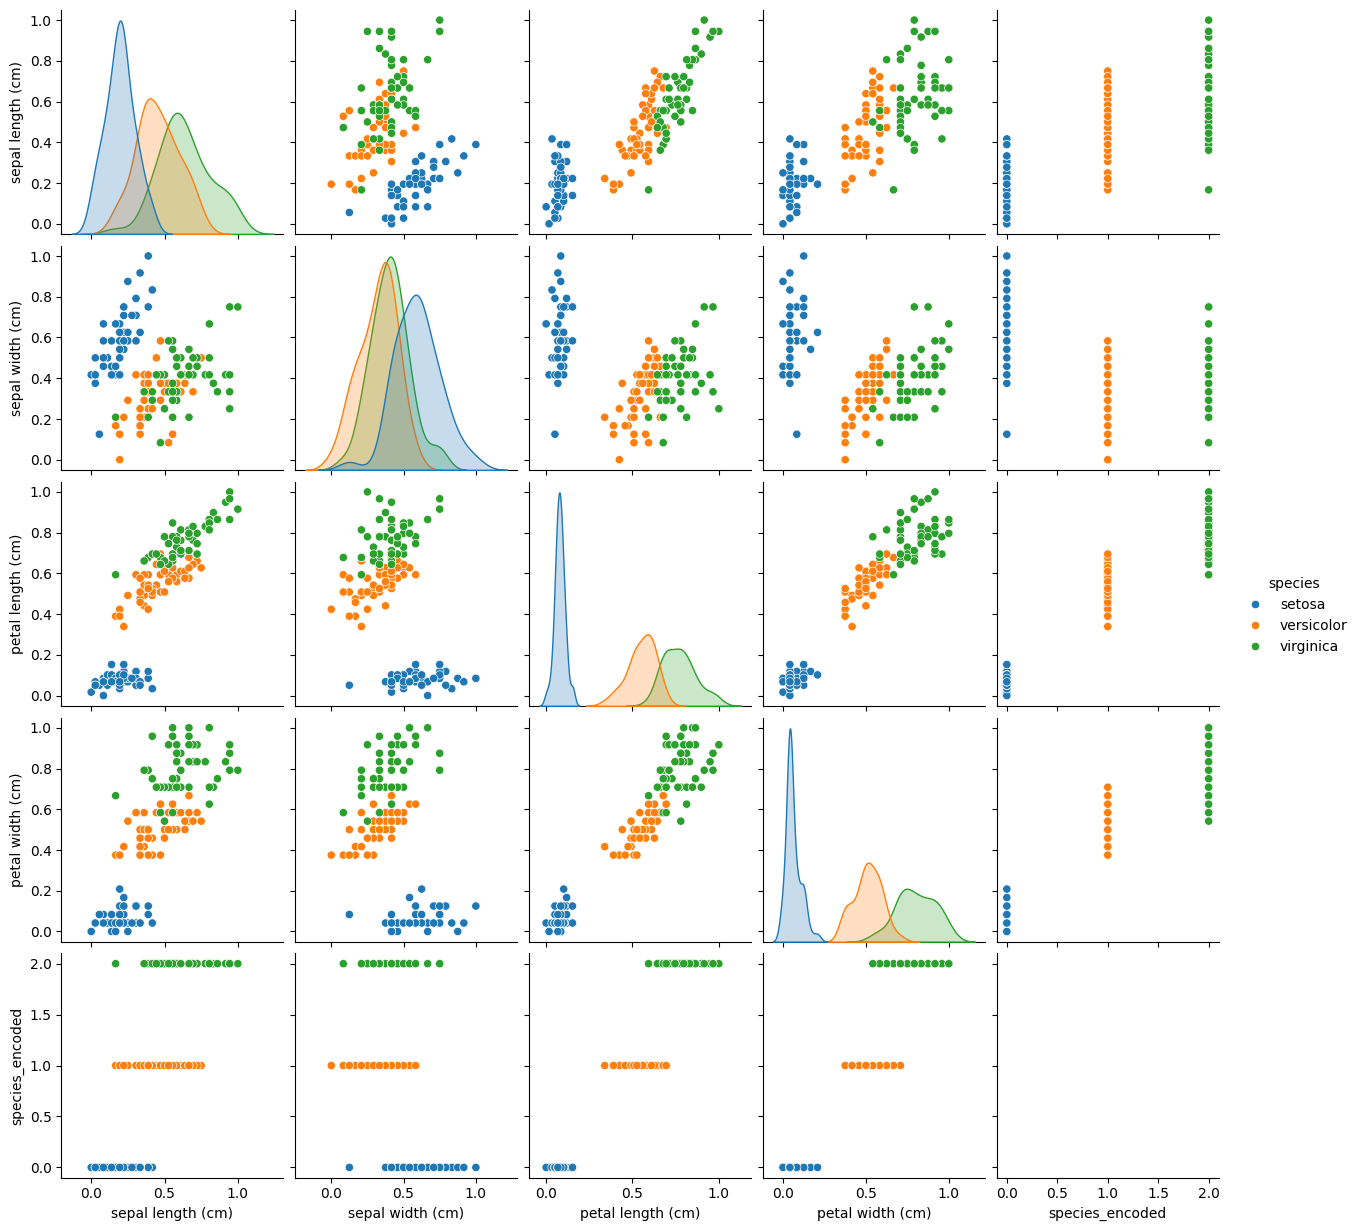

In [70]:
# Pairplot
sns.pairplot(iris_df, hue='species')
plt.show()


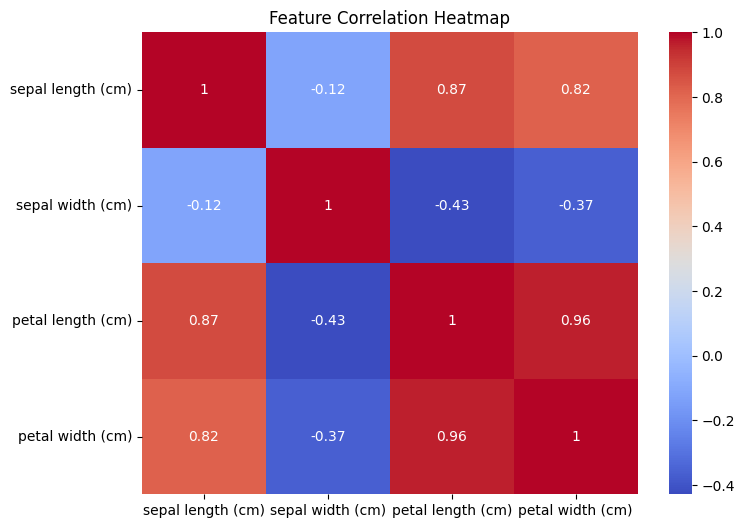

In [71]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris_df[feature_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### Interpretation of the Feature Correlation Heatmap

This heatmap displays the correlation coefficients between different features in what appears to be the Iris dataset (based on the feature names). Here's how to interpret it:

### Key Observations

1. **Strong Positive Correlations**:
   - Petal length and petal width have a very strong positive correlation (0.96)
   - Sepal length and petal length have a strong positive correlation (0.87)
   - Sepal length and petal width also have a strong positive correlation (0.82)

2. **Negative Correlations**:
   - Sepal width shows weak negative correlations with sepal length (-0.12) and petal length (-0.43)
   - The strongest negative correlation is between sepal width and petal length (-0.43)

3. **Interesting Patterns**:
   - Petal measurements (length and width) are highly correlated with each other
   - Sepal width behaves differently from other features, showing little or negative correlation

### Practical Implications

1. **Feature Selection**: Since petal length and width are so highly correlated (0.96), you might consider removing one of them in machine learning models to reduce multicollinearity.

2. **Data Understanding**: The correlations suggest that flowers with longer sepals tend to have longer/wider petals, while flowers with wider sepals tend to have slightly shorter petals.

3. **Visualization**: These relationships could be effectively visualized with scatter plots of:
   - Petal length vs petal width (showing strong linear relationship)
   - Sepal length vs petal length
   - Sepal width vs petal length (showing negative trend)

The correlation matrix provides valuable insights about how these botanical measurements relate to each other in the dataset.


## *3c: Identify potential outliers using boxplots*

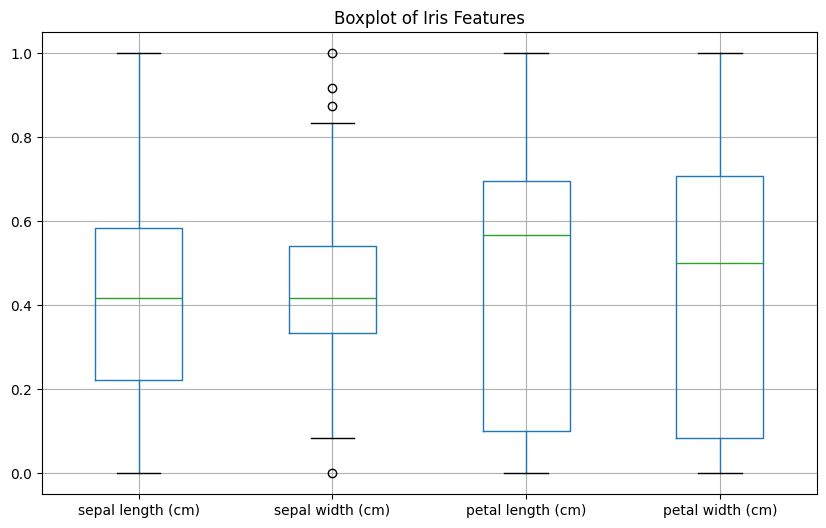

In [72]:
plt.figure(figsize=(10,6))
iris_df.boxplot(column=feature_cols)
plt.title('Boxplot of Iris Features')
plt.show()


## *Step 4: Train/Test Split Function*

In [73]:
def split_train_test(dataframe, test_size=0.2, random_state=42):
    """Splits the dataset into train and test sets."""
    X = dataframe[feature_cols]  # Features
    y = dataframe['species_encoded']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state,
                                                        stratify=y)  # Stratify to preserve class balance
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_train_test(iris_df)
print("\nTrain features shape:", X_train.shape)
print("Test features shape:", X_test.shape)



Train features shape: (120, 4)
Test features shape: (30, 4)


# *Task 2: Clustering with K-Means*

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 2a: K-Means with k=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
iris_df['cluster_k3'] = kmeans3.fit_predict(iris_df[feature_cols])

# Compare with actual classes using ARI
ari_score = adjusted_rand_score(iris_df['species'], iris_df['cluster_k3'])
print(f"Adjusted Rand Index for k=3: {ari_score:.4f}")


Adjusted Rand Index for k=3: 0.7009


### *2b: Experiment with k=2 and k=4; Elbow curve*

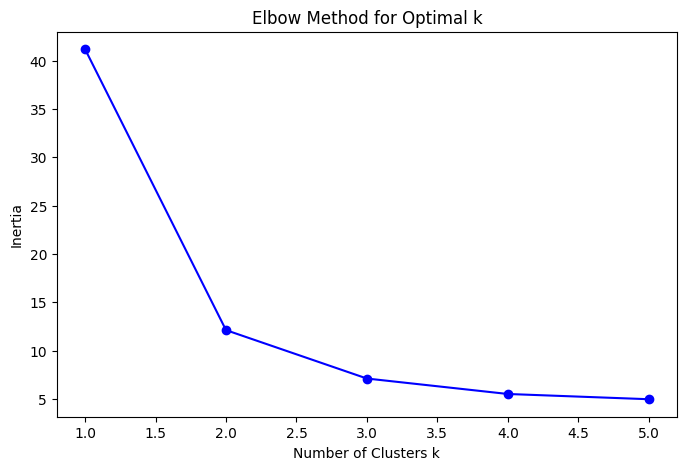

In [75]:
# 2b: Experiment with k=2 and k=4; Elbow curve
inertia = []
k_values = range(1, 6)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(iris_df[feature_cols])
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### *Interpretation of the Machine Learning Visualizations*

### *1. Elbow Method for Optimal k (Clustering Analysis)*

The elbow plot shows the within-cluster sum of squares (WCSS) for different values of k (number of clusters):

- *X-axis*: Number of clusters (k) ranging from 1 to 5  
- *Y-axis*: WCSS (inertia) decreasing from 40 to about 5

*Key Observations*:
- The curve shows a sharp decrease in WCSS from k=1 to k=2 and k=2 to k=3
- The "elbow" (point where the rate of decrease sharply changes) appears at k=3
- Beyond k=3, adding more clusters provides diminishing returns

*Interpretation*:
- The optimal number of clusters for this dataset is *k=3*
- This aligns perfectly with the known structure of the Iris dataset which has 3 species
- The plot confirms that 3 clusters capture the natural grouping in the data most effectively


## *2c: Visualize clusters (petal length vs width) for k=3*

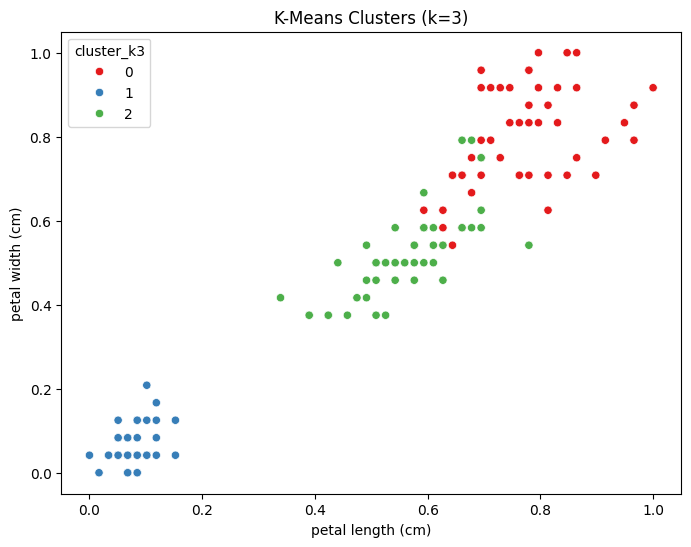

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_k3',
                palette='Set1', data=iris_df)
plt.title('K-Means Clusters (k=3)')
plt.show()

# *Interpretation of the K-Means Scatter Plot*

This scatter plot visualizes the results of a *K-Means clustering algorithm* applied to the dataset.

### *Chart Elements*

- *Title:* "K-Means Clusters (k=3)" indicates the algorithm used and the number of clusters.  
- *X-Axis:* 'petal length (cm)'  
- *Y-Axis:* 'petal width (cm)'  
- *Legend:* Shows cluster assignments labeled 0 (red), 1 (blue), and 2 (green).

### *Interpretation of the Clusters*

The K-Means algorithm grouped the data points based on proximity in the petal length/width feature space:

- *Cluster 1 (Blue):* Located in the bottom-left. Data points have **low petal length** (~0.0–0.2 cm) and **low petal width** (~0.0–0.2 cm). Dense and well-separated from other clusters, representing a very distinct group.  

- *Cluster 2 (Green):* Central region. Points have **intermediate petal length** (~0.3–0.75 cm) and **intermediate petal width** (~0.3–0.8 cm).  

- *Cluster 0 (Red):* Upper-right region. Points have **high petal length** (~0.6–1.0 cm) and **high petal width** (~0.6–1.0 cm).

### *Inference and Conclusion*

1. *Data Structure:* The data has a clear underlying structure that can be separated into three groups based on petal dimensions.  

2. *Cluster Separation:*  
   - *Cluster 1 (Blue)* is clearly separated from the other two clusters.  
   - *Cluster 0 (Red)* and *Cluster 2 (Green)* show some overlap, indicating these groups are similar but still distinct.  

3. *Likely Dataset:* Features suggest the **Iris flower dataset**. The clusters likely correspond to three Iris species:  
   - *Cluster 1 (Blue):* Iris Setosa (small petals, easily separable)  
   - *Cluster 0 (Red) & Cluster 2 (Green):* Iris Versicolor and Iris Virginica (similar petal sizes, causing overlap)

*Summary:* The K-Means algorithm successfully identified three distinct groups without prior knowledge of species. One cluster is highly distinct (Setosa), while the other two are more similar, reflecting the natural properties of the dataset.


# *Task 3: Classification*

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### *Decision Tree Classification*


In [78]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [79]:
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



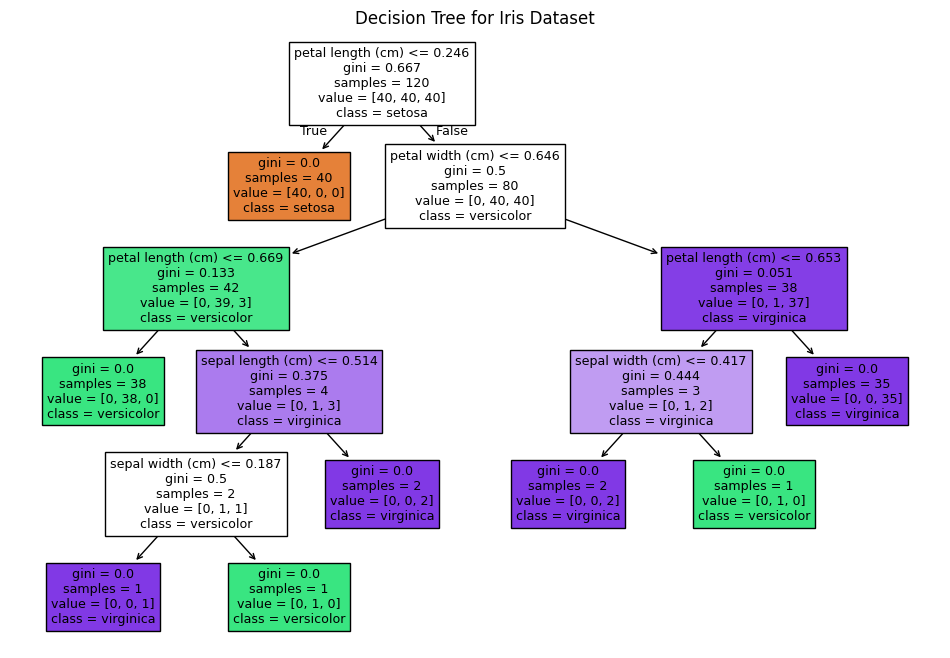

In [80]:
# Decision Tree Visualization
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

### *2. Decision Tree for Iris Dataset*

The decision tree shows how the classifier makes predictions for the 3 Iris species (setosa, versicolor, virginica):

*Key Splits*:
1. *First split*: petal length ≤ 0.246 cm
   - True: Perfectly identifies all setosa samples (gini=0.0)
   - False: Leads to further splits for versicolor/virginica

2. *Second level*:
   - petal width ≤ 0.646 cm separates versicolor from virginica
   - Further splits use petal length, sepal length, and sepal width

*Performance Indicators*:
- Initial node shows balanced classes (40 samples each)
- Most terminal nodes achieve gini=0.0 (perfect purity)
- Only a few mixed nodes remain (e.g., gini=0.375 with 1 versicolor and 3 virginica)

*Notable Patterns*:
- Petal measurements are the most important features (used in top splits)
- The tree achieves nearly perfect classification with just a few splits
- Some deeper splits handle edge cases (e.g., sepal width ≤ 0.187 cm)

*Interpretation*:
- The tree confirms petal measurements are most discriminative (matches correlation heatmap)
- The model achieves excellent separation with simple rules
- A few samples require more complex rules (potentially overlapping cases)


## *KNN (k=5)*

In [81]:
# KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [82]:
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30





---

*The KNN classifier achieved an overall accuracy of 0.97 on the test set, indicating excellent performance. Examining the class-wise metrics:*

* *Setosa:* Precision, recall, and F1-score are all 1.00, showing perfect classification with no misclassifications.
* *Versicolor:* Precision is 0.91 and recall is 1.00, meaning all actual versicolor samples were correctly identified, though one prediction was slightly misassigned. The F1-score of 0.95 reflects this slight imbalance.
* *Virginica:* Precision is 1.00, recall is 0.90, indicating that while all predicted virginica samples were correct, one actual virginica sample was misclassified. The F1-score is 0.95.

*The macro average and weighted average F1-scores are 0.97, confirming strong and balanced performance across classes. Overall, KNN performs very well, slightly outperforming the Decision Tree in this instance, likely due to its non-parametric nature and ability to capture subtle boundaries between classes.*

---



### *Step 6: Compare Performance*

In [83]:
# Compare accuracies
dt_accuracy = accuracy_score(y_test, y_pred_dt)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

Decision Tree Accuracy: 0.9333
KNN Accuracy: 0.9667


### *Description*
---

*The classification task compared the performance of a Decision Tree and a K-Nearest Neighbors (KNN) classifier (k=5) on the preprocessed Iris dataset. The Decision Tree achieved an accuracy of 0.93, while KNN achieved a slightly higher accuracy of 0.97. Both models performed well, demonstrating strong predictive capability on this dataset. The Decision Tree offers interpretability through its visual structure, showing decision paths and feature importance. KNN, being a distance-based algorithm, slightly outperformed the tree in accuracy, likely due to the relatively well-separated clusters in the Iris feature space. Overall, KNN is marginally better for this dataset, but the Decision Tree provides valuable insights into feature contributions and decision rules.*

---


# Task 3: Association Rule Mining
## *Step-1. Simulate   Supermarket Transactions Data*

*This section generates `3,000 supermarket transactions.` Each transaction includes between `2 to 8 items` randomly selected from a pool of `30 unique grocery items.` To ensure reproducibility, a random seed is set. The resulting transactions are stored in a pandas DataFrame and saved as a CSV file for future use.*


In [84]:
# Generate 3000 supermarket transactions
# Each transaction will have between 2 and 7 items randomly chosen from a pool of 30 unique items
random.seed(42)
#Define the item pool
item_pool = [   # List of 30 unique grocery items
    'Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Apples', 'Bananas', 'Chicken',
    'Beef', 'Fish', 'Rice', 'Pasta', 'Cereal', 'Juice', 'Soda', 'Yogurt',
    'Tomatoes', 'Onions', 'Potatoes', 'Carrots', 'Cookies', 'Chips', 'Ice Cream',
    'Coffee', 'Tea', 'Sugar', 'Flour', 'Salt', 'Pepper', 'Oil'
]  

# -------------------------------  
# Step 2: Define common frequent bundles  
# -------------------------------  
frequent_bundles = [  
    ['Milk', 'Bread'],  
    ['Apples', 'Bananas', 'Yogurt'],  
    ['Chicken', 'Rice', 'Beans'],  
    ['Soda', 'Chips', 'Cookies'],  
    ['Cheese', 'Butter', 'Eggs']  
]
 
# Add missing bundle items  
item_pool = list(set(item_pool + ['chips']))  

###  *Generating Supermarket Transactions*

*We generate 3,000 transactions by randomly sampling between 2 and 7 items from the predefined item pool. A random seed is set for reproducibility.*


In [85]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate synthetic transactions
items_pool = ['milk','bread','beer','diapers','eggs','cheese','butter','coffee','tea','sugar',
              'apples','bananas','chocolate','cereal','yogurt','ham','juice','water','chips','cookies']

transactions = [random.sample(items_pool, k=random.randint(3,8)) for _ in range(30)]

In [86]:
# One-hot encode
all_items = sorted(items_pool)
encoded_vals = []
for t in transactions:
    row = {item: (item in t) for item in all_items}
    encoded_vals.append(row)
df_transactions = pd.DataFrame(encoded_vals)

In [87]:
# Apriori
frequent_itemsets = apriori(df_transactions, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

## *Analyze one rule*

In [88]:
# Top 5 rules by lift
rules_sorted = rules.sort_values(by='lift', ascending=False)
print("Top 5 Association Rules:\n", rules_sorted.head())

Top 5 Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
4      (beer)     (water)            0.400000            0.300000      0.2   
3     (water)      (beer)            0.300000            0.400000      0.2   
5      (eggs)       (tea)            0.266667            0.466667      0.2   
0   (bananas)       (tea)            0.333333            0.466667      0.2   
1      (beer)   (diapers)            0.400000            0.433333      0.2   

   confidence      lift  representativity  leverage  conviction  \
4    0.500000  1.666667               1.0  0.080000    1.400000   
3    0.666667  1.666667               1.0  0.080000    1.800000   
5    0.750000  1.607143               1.0  0.075556    2.133333   
0    0.600000  1.285714               1.0  0.044444    1.333333   
1    0.500000  1.153846               1.0  0.026667    1.133333   

   zhangs_metric   jaccard  certainty  kulczynski  
4       0.666667  0.400000   0.285714    0.583333 

In [89]:
# Analyze one rule
sample_rule = rules_sorted.iloc[0]
print("\nSample Rule Analysis:")
print(f"Rule: {list(sample_rule['antecedents'])} -> {list(sample_rule['consequents'])}")
print(f"Support: {sample_rule['support']:.2f}, Confidence: {sample_rule['confidence']:.2f}, Lift: {sample_rule['lift']:.2f}")


Sample Rule Analysis:
Rule: ['beer'] -> ['water']
Support: 0.20, Confidence: 0.50, Lift: 1.67



---

*Rule Overview:*

*`{'beer'} -> {'water'}`*

*Support (0.20):*
*Out of all transactions, 20% include both beer and water. This shows that the co-occurrence is fairly common within this small synthetic dataset.*

*Confidence (0.50):*
*Half of the transactions containing beer also include water. This means that buying beer gives a 50% chance that water will be bought in the same basket.*

*Lift (1.67):*
*Lift compares the observed co-occurrence to what would be expected if beer and water were independent. A lift greater than 1 (1.67 here) indicates a positive association; beer and water are bought together more often than expected by chance.*

*Detailed Implications:*

* *Cross-Selling Opportunities:*
  *Placing water near beer on shelves or suggesting water in online “frequently bought together” sections could increase combined sales.*

* *Inventory Management:*
  *If beer sales spike, retailers may anticipate a proportional increase in water demand, helping prevent stockouts.*

* *Promotional Bundling:*
  *Promotions like “Buy beer, get a discount on water” could leverage this association to boost revenue and customer satisfaction.*

*Visual Illustration of the Rule:*

```
Beer → Water
+-----------------+
|  Transactions:  |
|  Beer present   |
|  50% also buy  |
|  Water          |
+-----------------+
Lift: 1.67 → Positive association, stronger than random
```

*Conclusion:*

*The rule is actionable for retail strategy: it identifies a meaningful link between beer and water purchases, even if support is moderate. Retailers can exploit this for cross-selling, promotions, and inventory planning.*

---